# Question: Can car specifications be used to predict mpg?

# 1. Data import and clean-up

In [0]:
#Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#importing data set
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg (1).csv


In [0]:
#Reading csv
mpg = pd.read_csv('auto-mpg.csv')

In [7]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Quick note, Origin is seperated into 1: America, 2: Europe, 3: Asia

In [8]:
print(mpg.columns)
len(mpg.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


9

Looks like theres 9 columns or features

In [9]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Dataset contains 398 cars, and (miraculously) there doesn't seem to be any missing data

Lets double check how many NaN values we have, to make sure I'm not dreaming

In [10]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Yep! No null values, thank you University College London 

Since the car name is fairly unique, lets try to extract the first word (which should be the car manufacturer)

In [11]:
mpg['make'] = mpg['car name'].apply(lambda x: x.split(' ', 1)[0])
mpg['make']

0       chevrolet
1           buick
2        plymouth
3             amc
4            ford
5            ford
6       chevrolet
7        plymouth
8         pontiac
9             amc
10          dodge
11       plymouth
12      chevrolet
13          buick
14         toyota
15       plymouth
16            amc
17           ford
18         datsun
19     volkswagen
20        peugeot
21           audi
22           saab
23            bmw
24            amc
25           ford
26          chevy
27          dodge
28             hi
29         datsun
          ...    
368     chevrolet
369     chevrolet
370       pontiac
371         dodge
372       pontiac
373          ford
374           amc
375    volkswagen
376         mazda
377         mazda
378      plymouth
379       mercury
380        nissan
381         honda
382        toyota
383         honda
384         honda
385        datsun
386         buick
387    oldsmobile
388      chrysler
389          ford
390        toyota
391         dodge
392     ch

Much better, finally we need to double-check that all the features are of an appopriate type

In [12]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
make             object
dtype: object

Converting horsepower from an object to a int will make it easier to work with 

In [13]:
mpg['horsepower'] = mpg['horsepower'].apply(lambda x: int(x))

ValueError: ignored

I include this error on purpose, because it tells us that whichever genius created this data set used a question mark for one of the unknown horspowers rather than a null value

In [0]:
mpg.replace('?', 0, inplace=True)

In [0]:
mpg['horsepower'] = mpg['horsepower'].apply(lambda x: int(x))

In [16]:
mpg[mpg['horsepower'] == 0]['horsepower'].count()

6

In [0]:
mpg = mpg[mpg['horsepower'] != 0]

In [18]:
mpg[mpg['horsepower'] == 0]['horsepower'].count()

0

Above is the jank code to fix that problem 

# Numerical Analysis

Let's look at the averages for the three categorical features: price, mileage, and registration year

In [19]:
round(mpg[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']].mean(), 2)

mpg               23.45
cylinders          5.47
displacement     194.41
horsepower       104.47
weight          2977.58
acceleration      15.54
model year        75.98
origin             1.58
dtype: float64

Also, we can check how many of each car manufacturer there are

In [20]:
mpg['make'].value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
peugeot           8
fiat              8
audi              7
volvo             6
chrysler          6
vw                6
subaru            4
saab              4
opel              4
chevy             3
renault           3
bmw               2
maxda             2
cadillac          2
mercedes-benz     2
chevroelt         1
vokswagen         1
capri             1
nissan            1
hi                1
toyouta           1
triumph           1
mercedes          1
Name: make, dtype: int64

Ford and Chevy seem to be the most popular

# Visualizations

Pairplot should give us a good overall first impression of the data

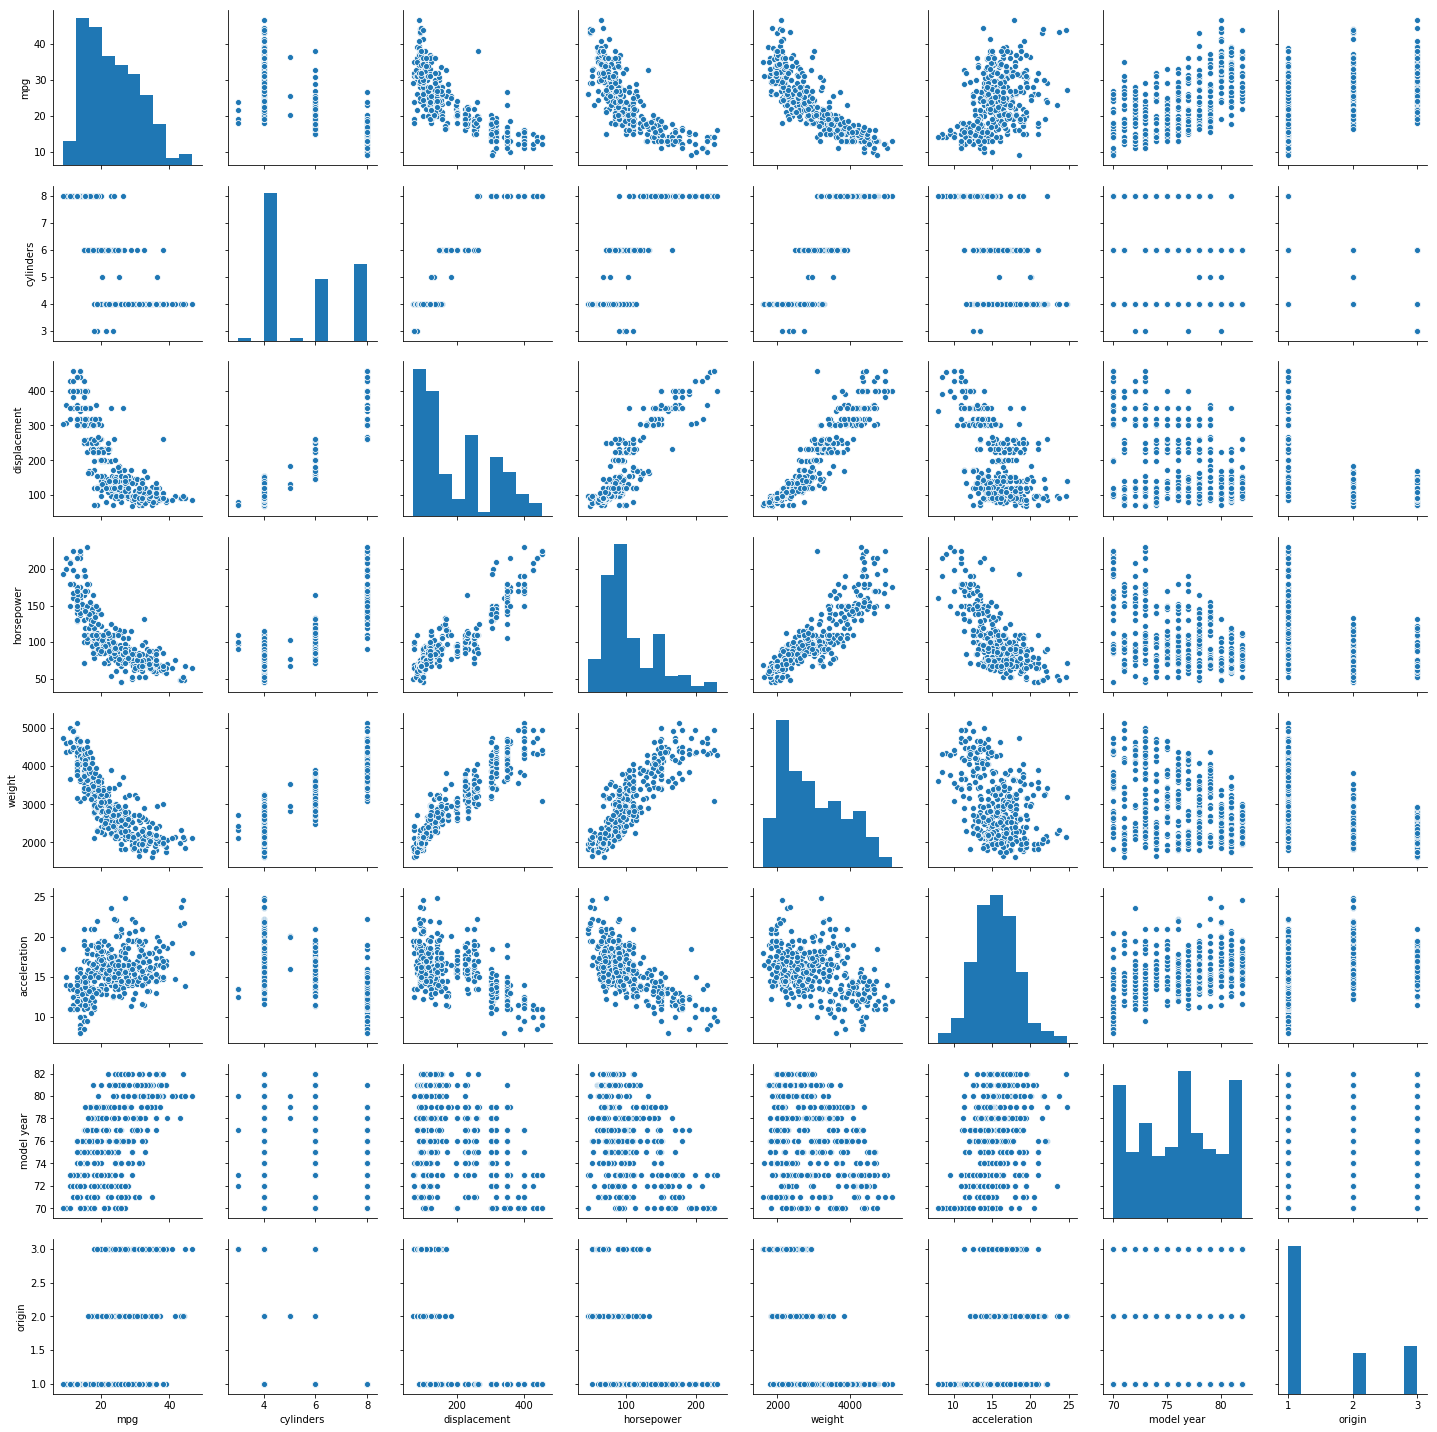

In [21]:
sns.pairplot(mpg)

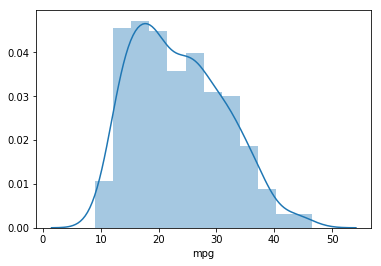

In [22]:
sns.distplot(mpg['mpg'])

Now lets visualize the distribution of the 10 most popular car brands using a pie chart

In [85]:
mpg['make'].value_counts().nlargest(10)

ford          48
chevrolet     43
plymouth      31
dodge         28
amc           27
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: make, dtype: int64

In [0]:
labels = mpg['make'].value_counts().nlargest(10).index.tolist()

In [149]:
mpg.groupby(['make'])['cylinders'].value_counts()

make           cylinders
amc            6            17
               8             8
               4             2
audi           4             5
               5             2
bmw            4             2
buick          6             7
               8             7
               4             3
cadillac       8             2
capri          4             1
chevroelt      6             1
chevrolet      8            18
               4            15
               6            10
chevy          8             2
               4             1
chrysler       8             4
               4             1
               6             1
datsun         4            20
               6             3
dodge          4            12
               8            12
               6             4
fiat           4             8
ford           8            20
               4            16
               6            12
hi             8             1
                            ..
mercedes-benz 

In [0]:
cylinder_values = mpg.groupby(['make'])['cylinders'].value_counts().tolist()
cylinder_labels = mpg.groupby(['make'])['cylinders'].value_counts().index.tolist()

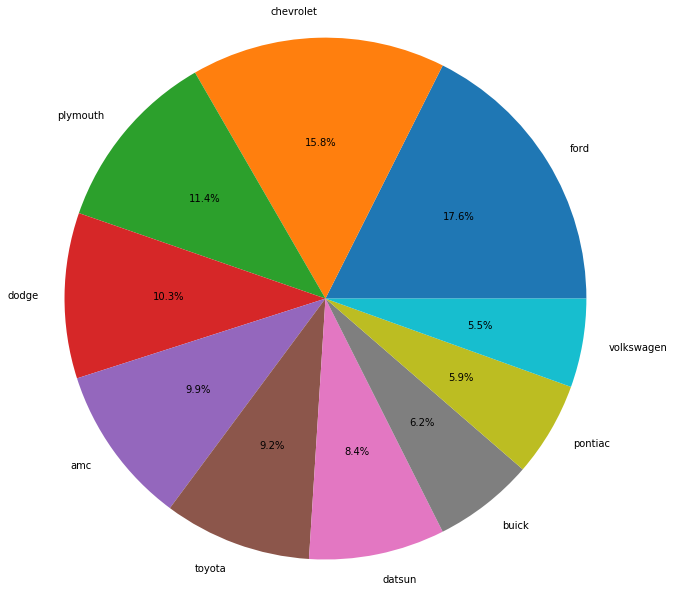

In [150]:
plt.pie(x=mpg['make'].value_counts().nlargest(10), labels=labels, autopct='%1.1f%%', radius=3)
plt.show()

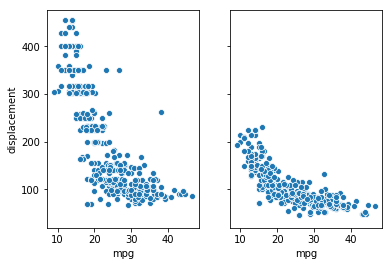

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.scatterplot(x='mpg', y='displacement', data=mpg, ax=ax1)
sns.scatterplot(x='mpg', y='horsepower', data=mpg, ax=ax2)

Both displacement and horspower follow this decay trend when plotted against mpg. Lets take a closer look:

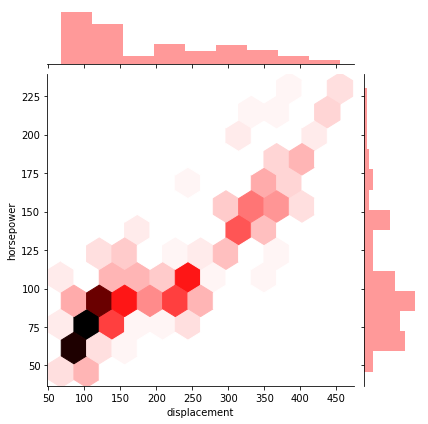

In [23]:
sns.jointplot(mpg['displacement'], mpg['horsepower'], kind='hex', color="red")

It seems that there is no replacement for displacement

Text(0, 0.5, 'MPG')

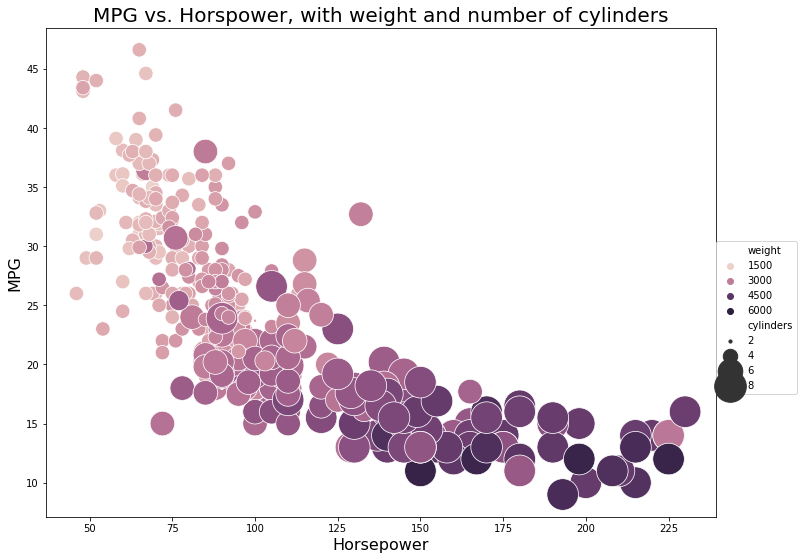

In [47]:
plt.figure(figsize=(12,9))

scatter = sns.scatterplot(x=mpg['horsepower'], y=mpg['mpg'], hue=mpg['weight'], size=mpg['cylinders'], sizes=(10, 1000))
scatter.legend(loc=(1,0.25)) # specify the legend location manually, otherwise it overlaps with the graph

plt.title("MPG vs. Horspower, with weight and number of cylinders", fontdict={'fontsize': 20})
plt.xlabel("Horsepower", fontdict={'fontsize': 16})
plt.ylabel("MPG", fontdict={'fontsize': 16})

Now this is really interesting. As the horsepower (further right), weight (darker color), and number of cylinders (size).

# Predictive Model

Linear Regression

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
X_train, X_test, y_train, y_test = train_test_split(mpg.drop(['mpg', 'car name', 'make'],axis=1), mpg['mpg'], test_size=0.30, random_state=42)

In [50]:
LinRegression = LinearRegression()
LinRegression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions = LinRegression.predict(X_test)

Text(0, 0.5, 'Predicted Y')

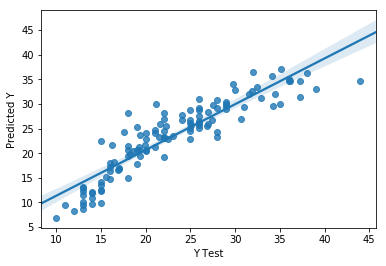

In [52]:
sns.regplot(x=y_test, y=predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

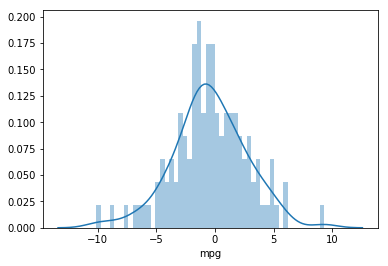

In [53]:
sns.distplot((y_test-predictions),bins=50);

Residuals aproximately normally distributed

In [54]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.438020350355284
MSE: 10.06587778358933
RMSE: 3.1726767537190628


In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.8097361276184133

MLP Regressor

In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
X_train, X_test, y_train, y_test = train_test_split(mpg.drop(['mpg', 'car name', 'make'],axis=1), mpg['mpg'], test_size=0.20, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [0]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(estimator=MLPRegressor(), param_grid =  {'alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001], 
                                                            'max_iter': [100, 500, 1000, 5000], 
                                                            'hidden_layer_sizes': [50, 100, 150, 200]})

In [193]:
grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

In [194]:
best_params

{'alpha': 1e-05, 'hidden_layer_sizes': 200, 'max_iter': 5000}

In [197]:
MLP = MLPRegressor(alpha=0.00005, hidden_layer_sizes=200, max_iter=5000, )
MLP.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=5e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=200, learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
predictions_MLP = MLP.predict(X_test)

In [199]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_MLP))
print('MSE:', metrics.mean_squared_error(y_test, predictions_MLP))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_MLP)))

r2_score(y_test, predictions_MLP)

MAE: 1.8406306444391718
MSE: 6.699637842329338
RMSE: 2.588365863306294


0.8687390030234496